In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale = 1.5)
# load data
correlations = pd.read_csv('./output/vars_sorted.csv')

In [28]:
#correlations.dtypes
#correlations = correlations[correlations.Diff_corr_and_corr_imp != '#DIV/0!']
#correlations.Diff_corr_and_corr_imp = correlations.Diff_corr_and_corr_imp.astype('float')
correlations

,Unnamed: 0,description,pearson_corr,pearson_p_val,spearman_corr,spearman_p_val,%mis,pearson_corr_imp,pearson_p_val_imp,spearman_corr_imp,spearman_p_val_imp
0,label,SMFQ depression score above cutoff at any poin...,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
1,fddp130_120m,Depression Score at Focus 10 assessment: F10+,0.256065,3.728890e-44,0.258177,6.990633e-45,0.140072,0.254006,3.006786e-50,0.278361,2.188589e-60
2,ku710b_108m,DV: SDQ - Total difficulties score (prorated),0.214249,6.479717e-31,0.219620,1.950484e-32,0.146071,0.202550,3.318076e-32,0.218187,3.220255e-37
3,Avg_FinDiff_61m,"Average Financial Difficulties (Avg of 1y,2y,5y)",0.173122,6.561159e-22,0.189192,6.341048e-26,0.086983,0.168446,1.211597e-22,0.194802,7.188916e-30
4,c645_32wg,Mums highest ed qualification,-0.171721,4.066583e-21,-0.176322,3.405491e-22,0.107978,-0.168526,1.155843e-22,-0.173111,7.656027e-24
...,...,...,...,...,...,...,...,...,...,...,...
850,g332a_21m,Mum returned to work >CH8MTHs yes/no,0.000063,9.972710e-01,0.000063,9.972710e-01,0.120876,-0.001488,9.315719e-01,-0.053421,2.031176e-03
851,f461_8m,Years since marriage,-0.000039,9.984598e-01,-0.002135,9.157649e-01,0.263047,-0.027372,1.140611e-01,-0.026398,1.275227e-01
852,vitdd2i_F7_84m,"Vitamin D (25(OHD2)) indicator <1.25, F7",NaN,NaN,NaN,NaN,0.963407,NaN,NaN,NaN,NaN
853,kr823_91m,DV: DAWBA DSM-IV clinical diagnosis - Posttrau...,NaN,NaN,NaN,NaN,0.164967,NaN,NaN,NaN,NaN


In [29]:
#ax = sns.scatterplot(data=correlations, x = "%mis", y= "Diff_corr_and_corr_imp")
#ax

In [30]:
#ax.set_ylim(0, 1)
#ax.figure

In [31]:
correlations['Diff_pcorr_and_pcorr_imp_dir'] = (correlations['pearson_corr_imp'] - correlations['pearson_corr']) / (correlations['pearson_corr'])

In [32]:
correlations

,Unnamed: 0,description,pearson_corr,pearson_p_val,spearman_corr,spearman_p_val,%mis,pearson_corr_imp,pearson_p_val_imp,spearman_corr_imp,spearman_p_val_imp,Diff_pcorr_and_pcorr_imp_dir
0,label,SMFQ depression score above cutoff at any poin...,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
1,fddp130_120m,Depression Score at Focus 10 assessment: F10+,0.256065,3.728890e-44,0.258177,6.990633e-45,0.140072,0.254006,3.006786e-50,0.278361,2.188589e-60,-0.008041
2,ku710b_108m,DV: SDQ - Total difficulties score (prorated),0.214249,6.479717e-31,0.219620,1.950484e-32,0.146071,0.202550,3.318076e-32,0.218187,3.220255e-37,-0.054604
3,Avg_FinDiff_61m,"Average Financial Difficulties (Avg of 1y,2y,5y)",0.173122,6.561159e-22,0.189192,6.341048e-26,0.086983,0.168446,1.211597e-22,0.194802,7.188916e-30,-0.027010
4,c645_32wg,Mums highest ed qualification,-0.171721,4.066583e-21,-0.176322,3.405491e-22,0.107978,-0.168526,1.155843e-22,-0.173111,7.656027e-24,-0.018602
...,...,...,...,...,...,...,...,...,...,...,...,...
850,g332a_21m,Mum returned to work >CH8MTHs yes/no,0.000063,9.972710e-01,0.000063,9.972710e-01,0.120876,-0.001488,9.315719e-01,-0.053421,2.031176e-03,-24.537628
851,f461_8m,Years since marriage,-0.000039,9.984598e-01,-0.002135,9.157649e-01,0.263047,-0.027372,1.140611e-01,-0.026398,1.275227e-01,701.506374
852,vitdd2i_F7_84m,"Vitamin D (25(OHD2)) indicator <1.25, F7",NaN,NaN,NaN,NaN,0.963407,NaN,NaN,NaN,NaN,NaN
853,kr823_91m,DV: DAWBA DSM-IV clinical diagnosis - Posttrau...,NaN,NaN,NaN,NaN,0.164967,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='%mis', ylabel='Diff_pcorr_and_pcorr_imp_dir'>

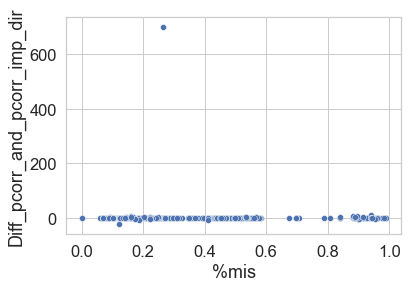

In [33]:
ax = sns.scatterplot(data=correlations, x = "%mis", y= "Diff_pcorr_and_pcorr_imp_dir")
ax

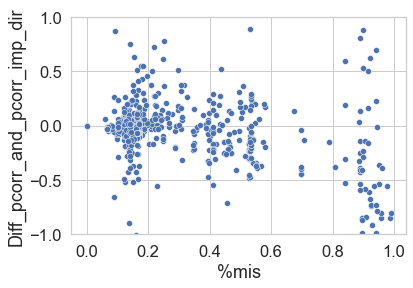

In [34]:
ax.set_ylim(-1, 1)
ax.figure

In [35]:
plt.tight_layout()
ax.figure.tight_layout()

ax.figure.savefig('./output/directional_correlations.svg', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [36]:
correlations[correlations.Diff_pcorr_and_pcorr_imp_dir > 0]

,Unnamed: 0,description,pearson_corr,pearson_p_val,spearman_corr,spearman_p_val,%mis,pearson_corr_imp,pearson_p_val_imp,spearman_corr_imp,spearman_p_val_imp,Diff_pcorr_and_pcorr_imp_dir
19,MOMED5Y_61m,Mother's educational qualification 5 years,-0.151746,8.803366e-16,-0.156016,1.321870e-16,0.166467,-0.154687,2.646461e-19,-0.164122,1.459689e-21,0.019382
22,Max_ed5y_61m,Highest ed achieved by mom or partner 5 years,-0.151076,1.179462e-15,-0.154117,3.092480e-16,0.166467,-0.155679,1.555094e-19,-0.172797,9.245862e-24,0.030465
24,FinDiff_61m,Financial Difficulties score,0.150349,2.291643e-15,0.156626,1.465039e-16,0.175465,0.155514,1.699371e-19,0.176003,1.329376e-24,0.034349
31,c666_32wg,Partners highest ed qualification,-0.143069,2.168895e-14,-0.142237,3.070585e-14,0.152669,-0.156611,9.402037e-20,-0.160663,1.019489e-20,0.094655
39,Global_116m,SDQI - global self-esteem,-0.134691,5.186554e-13,-0.119880,1.360768e-10,0.145171,-0.135507,3.915317e-15,-0.135670,3.627281e-15,0.006055
...,...,...,...,...,...,...,...,...,...,...,...,...
839,MaternalSeparations_103m,Sum of periods with maternal separations (from...,-0.001213,9.535984e-01,0.024377,2.420422e-01,0.308638,-0.001601,9.263690e-01,0.098283,1.296212e-08,0.320323
840,cf051_8m,Length at 8 mth,0.002577,9.605440e-01,0.001879,9.712330e-01,0.888722,0.006188,7.209586e-01,0.013134,4.483927e-01,1.401210
842,cf060_4m,BMI at 4 mth,-0.002266,9.698395e-01,-0.027233,6.494285e-01,0.915717,-0.008928,6.063438e-01,-0.012294,4.779515e-01,2.940422
844,p2042r_110m,B43: Mother's husband/partner started a new jo...,-0.000694,9.706932e-01,-0.000694,9.706932e-01,0.159568,-0.003787,8.269712e-01,-0.062120,3.319904e-04,4.454039


In [37]:
correlations.to_csv('./output/vars_sorted_dir.csv')

In [38]:
preprocessed_with_temporal = pd.read_csv('./output/preprocessed_data_with_temporal.txt')


In [39]:
len(preprocessed_with_temporal['timestamp'].unique())

54

In [40]:
preprocessed_with_temporal['timestamp'].unique()

array(['8wg', '15wg', '18wg', '20wg', '32wg', '0m', '4w', '1m', '8w',
       '6m', '8m', '18m', '21m', '24m', '42m', '47m', '61m', '69m', '84m',
       '90m', '91m', '97m', '120m', '122m', '192m', '12wg', '25wg', '30m',
       '33m', '38m', '57m', '73m', '81m', '85m', '96m', '103m', '108m',
       '115m', '116m', '127m', '144m', '162m', '204m', '110m', '216m',
       '13wg', '12m', '25m', '31m', '37m', '43m', '49m', '102m', '4m'],
      dtype=object)